In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [43]:
train_features = pd.read_csv("data/train_features.csv", index_col="id")
test_features = pd.read_csv("data/test_features.csv", index_col="id")
train_labels = pd.read_csv("data/train_labels.csv", index_col="id")

In [35]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent,gt_class
id,,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,bird
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,monkey_prosimian
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,leopard


In [5]:
train_features.head()

,filepath,site
id,,
ZJ000000,train_features/ZJ000000.jpg,S0120
ZJ000001,train_features/ZJ000001.jpg,S0069
ZJ000002,train_features/ZJ000002.jpg,S0009
ZJ000003,train_features/ZJ000003.jpg,S0008
ZJ000004,train_features/ZJ000004.jpg,S0036


In [6]:
test_features.head()

,filepath,site
id,,
ZJ016488,test_features/ZJ016488.jpg,S0082
ZJ016489,test_features/ZJ016489.jpg,S0040
ZJ016490,test_features/ZJ016490.jpg,S0040
ZJ016491,test_features/ZJ016491.jpg,S0041
ZJ016492,test_features/ZJ016492.jpg,S0040


In [8]:
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

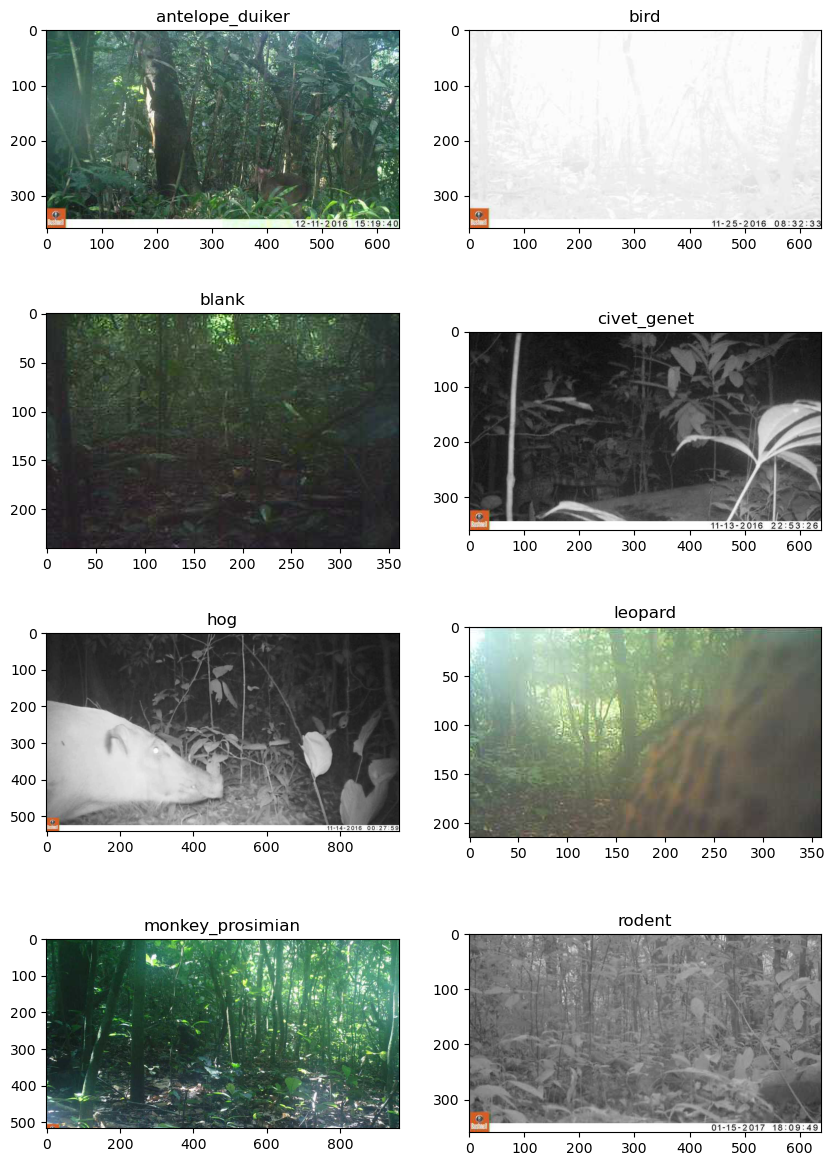

In [37]:
random_state = 23

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for species, ax in zip(species_labels, axes.flat):

    img_id = (
        train_labels[train_labels.loc[:,species] == 1]
        .sample(1, random_state=random_state)
        .index[0]
    )
    # reads the filepath and returns a numpy array
    img = Image.open("data/" + train_features.loc[img_id].filepath)
    # plot etc
    ax.imshow(img)
    ax.set_title(species)

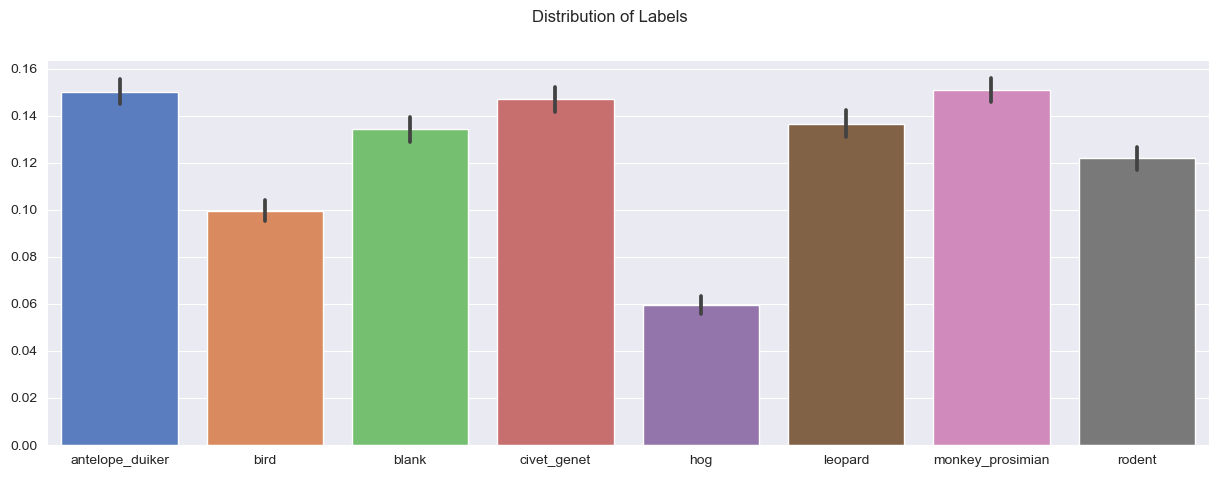

In [93]:
fig = plt.figure(figsize=(15, 5))
sns.set_palette("muted")
sns.barplot(data=train_labels)
fig.suptitle("Distribution of Labels")
plt.show()

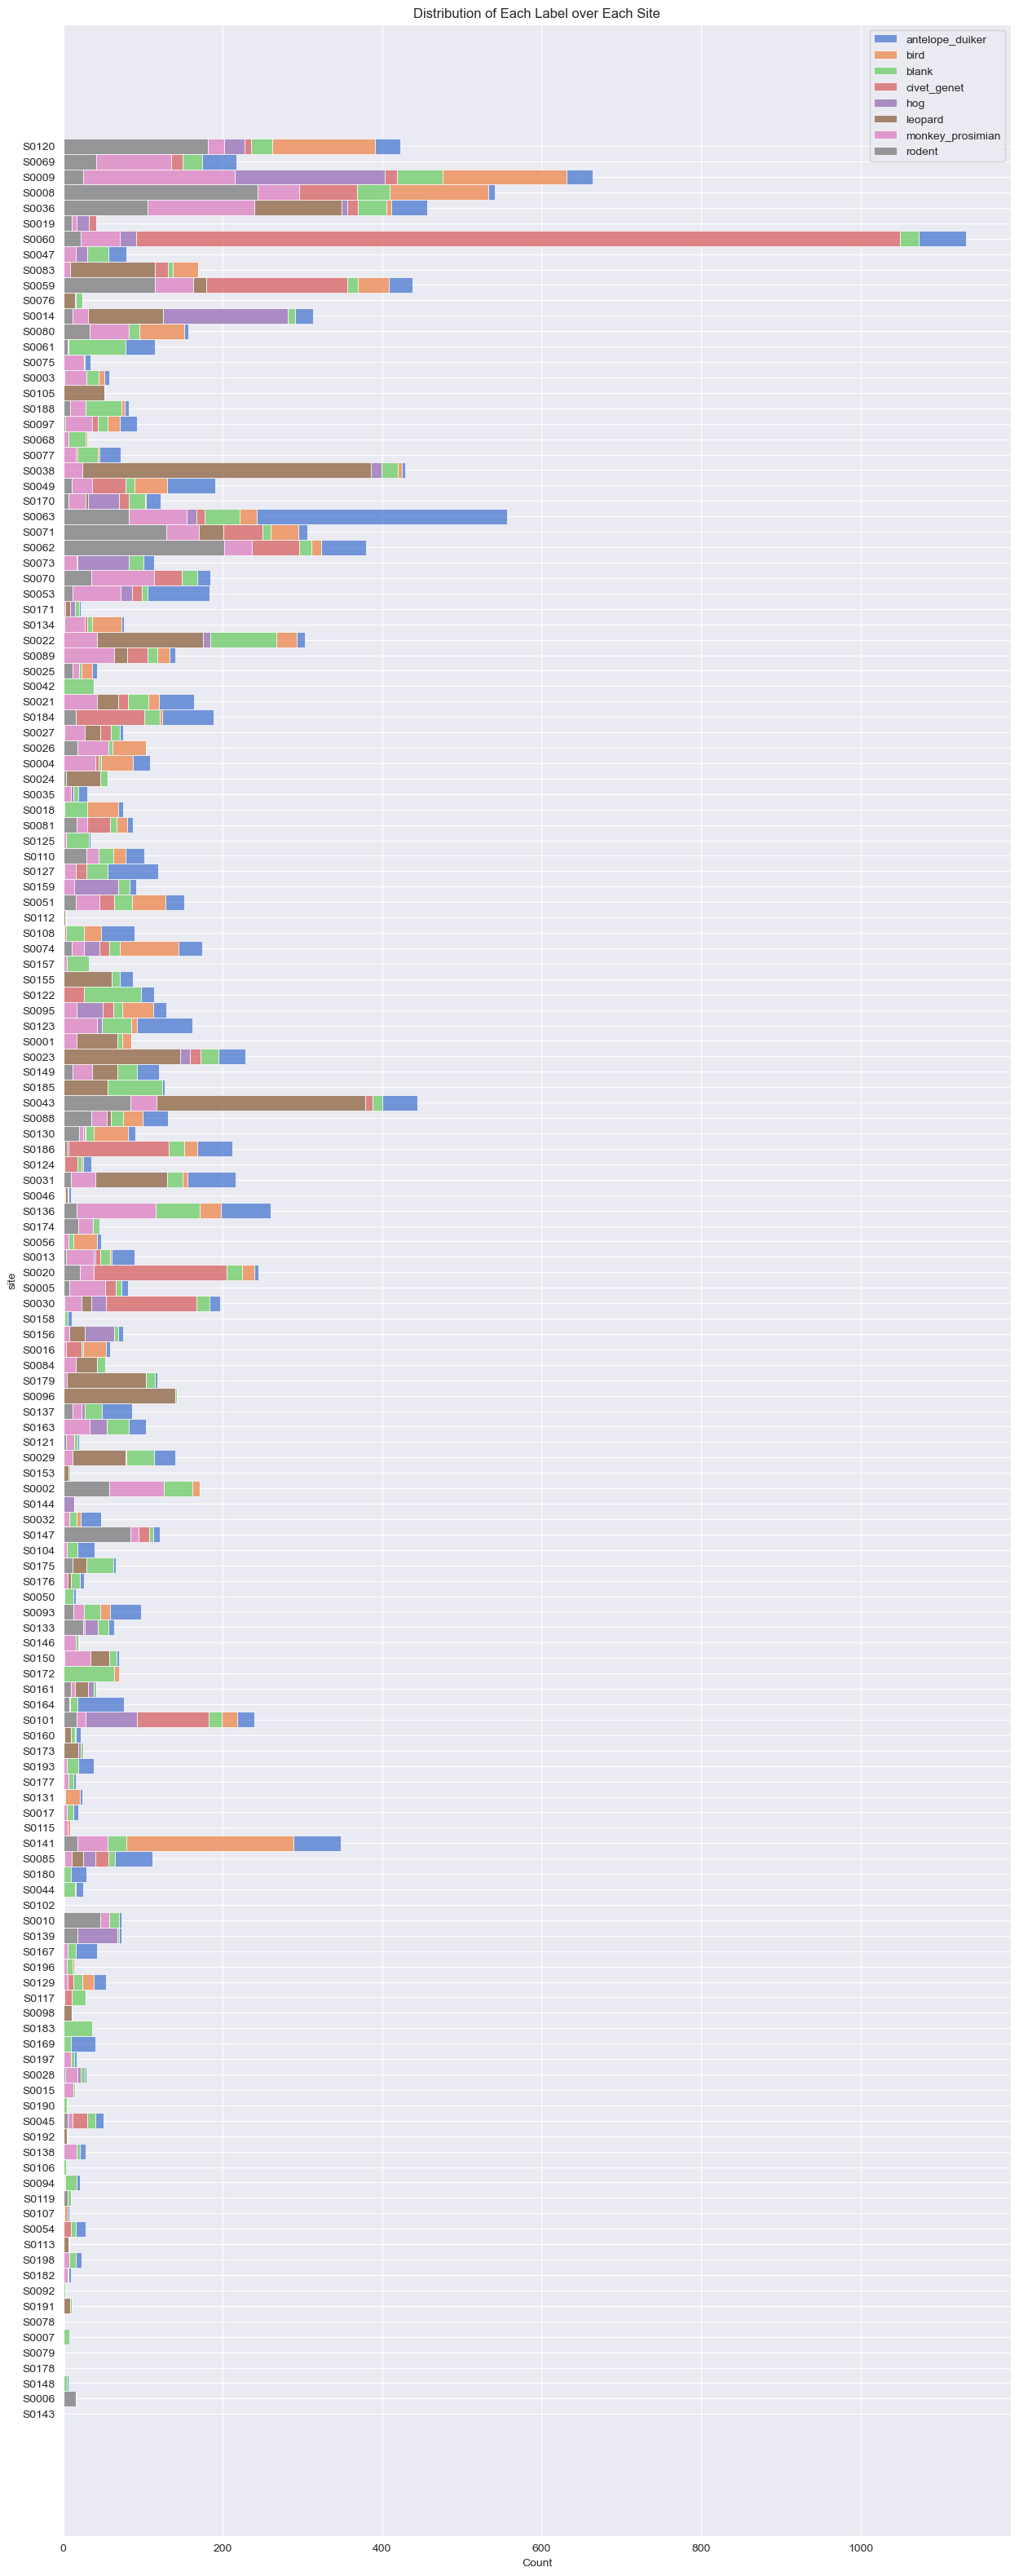

In [95]:
f, ax = plt.subplots(figsize=(15, 40))
sns.set_style("darkgrid")
sns.set_palette("muted")
sns.histplot(data = train_labels.join(train_features, on="id"),
            y="site", hue=train_labels.idxmax(axis=1), multiple="stack", linewidth=.5,
             hue_order=["antelope_duiker", "bird", "blank", "civet_genet", "hog", "leopard", "monkey_prosimian", "rodent"])
ax.set_title("Distribution of Each Label over Each Site")
plt.show()